<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/09_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [6]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


# IMDB 리뷰 데이터셋

In [7]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500) #가장 빈도가 많은(높은) 단어로 어휘사전을 만든다
print(X_train.shape, y_train.shape)

(25000,) (25000,)


In [8]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
lengths = np.array([len(x) for x in X_train])
print(np.mean(lengths), np.median(lengths))

237.93078125 179.0


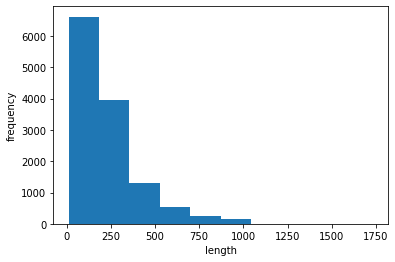

In [14]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100) #문장 최대 길이 = 단어 100개
print(train_seq.shape)

(12800, 100)


In [19]:
print(train_seq[0])  #문장은 시작이 0, 100보다 길면 짤린다

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   4
 251   8 251   2   2   7   2  23   6   2  11   4 154   2   2 116  34 199
   2 156  14 152  60 235  40   6  20  25 235  40 335  50   2   2 144   2
 111 139  26   2  24  43   2  36  26 147]


In [17]:
print(X_train[0][-10:]) # 뒤쪽에 중요한 단어가 많이 나오므로, 뒤에서 단어 10개를 골라본 것

[111, 139, 26, 2, 24, 43, 2, 36, 26, 147]


In [18]:
print(train_seq[5]) # 100보다 작다

[  0   0   0   0   0   0   1  13   2  14  23   4   2 236 314  13 423   4
  20  13   2   8   2 342 275 211   2 263 241 362  13 191 276  61   2  23
   2 138  13 423  14  20  85  74 319  78 471  52   5  52 471   2  78  13
 423   4 168   2   2  47 143   4 226  20  40  13 191   2  14   9   2   8
  72   2  45  52  42  78  12   4 172 168   5  12 495  87 277   2 158   2
  12  42   2  12  23   4   2  40  13 122]
